In [ ]:
!pip install keras

In [1]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install numpy==1.23.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

Visualizing the dataset

In [4]:
import matplotlib.pyplot as plt 

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[56]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56, 105,
        220, 254,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_cat_train = to_categorical(y_train,10)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
single_image.max()

255

In [19]:
single_image.min()

0

In [20]:
x_train= x_train/255
x_test =x_test/255

In [21]:
scaled_image = x_train[0]

In [22]:
scaled_image.max()

1.0

In [23]:
scaled_image.min()

0.0

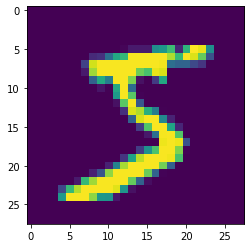

In [24]:
plt.imshow(scaled_image)

Reshaping
add color channel )( to make neural network robust)

In [25]:
x_train = x_train.reshape(60000, 28,28,1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test= x_test.reshape(10000, 28,28,1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

# Model

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [31]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape= (28,28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

# Compiling The Model

In [38]:
model.compile(loss='categorical_crossentropy', optimizer= 'rmsprop', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

# Train Our Model

In [40]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2


1875/1875 [==============================] - 17s 8ms/step - loss: 0.1628 - accuracy: 0.9503
Epoch 2/2
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0536 - accuracy: 0.9843


In [41]:
model.metrics_names

['loss', 'accuracy']

# Evaluating The Model

In [42]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0439 - accuracy: 0.9847


[0.04388915002346039, 0.9847000241279602]

In [45]:
from sklearn.metrics import classification_report 

In [46]:
import numpy as np

In [47]:
predictions = model.predict(x_test)
prediction_classes= np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


# Generating Report

In [48]:
report =classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

